# Modeldescription, IS-LM

We have decided to consider an IS-LM model describing the interaction between the goods and money market. It illustrates how the economy reaches equilibrium in the short run when considering both real and monetary factors. It consists of 2 curves, the IS- and LM-curve.

**IS curve (Investment-Savings):** defines the equilibrium on the goods market, given the interest rate and income level.
$$
Y = C(Y - T) + I(r) + G
$$

where *Y* is the income level, *T* is a lump-sum tax, *G* is government spending, *C* is private consumption, and *I(r)* is investment, which depends endogenously on the interest rate, *r*, in percent. We assume *C* and *I(r)* to follow these forms:

$$
\begin{aligned}
C &= a + b \cdot (Y - T) \\
I(r) &= c - d \cdot r
\end{aligned}
$$
where *a*, *b*, *c* and *d* are exogenous parameters.

**LM curve (Liquidity Preference-Money Supply):** defines the the money market equilibrium, given combinations of the interest rate and income level.
$$
\frac{M}{P}=L(r,Y)
$$
where *M* equals nominal money supply, *P* is the price level and *L(r,Y)* is money demand as a function of income and interest rate:
$$
L(r,Y)=e\cdot Y-f\cdot r
$$
where *e* and *f* are exogenous parameters.

## Analytical solution

First, we consider an analytical solution of the model. To solve for this analytical solution we do as follows:
1. Given our equations we can rewrite our IS-LM equations into two new forms
2. We use these two new equations to solve for the analytical solutions on equation form
3. We can calculate the aggregate demand, *Y*, and interest rate, *r*, given a set of parameters defined as:
    - T = 100   (taxes)
    - G = 400   (goverment spendings)
    - M = 1200  (money supply)
    - P = 1     (price level)
    - a = 200   (autonomous consumption)
    - b = 0.7   (marginal propensity to consume)
    - c = 300   (autonomous investment)
    - d = 80    (interest rate sensitivity of investment)
    - e = 0.6   (sensitivity of money demand to changes in income)
    - f = 20    (sensitivity of money demand to changes in interest rates)

In [1]:
# Import the IS-LM model from modelproject.py and then initialize it
from modelproject import IS_LM_model_analytical
analytical_model = IS_LM_model_analytical()

# Derive and solve for the IS-LM equations
analytical_model.derive_IS_LM_equations()
analytical_model.solve_IS_LM_analytically()

# Print the IS-LM equations and equilibrium solution
analytical_model.print_IS_LM_equations()
analytical_model.print_solution()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Equilibrium Output (Y): 2085.19
Equilibrium Interest Rate (r): 2.56


We have derived new forms of the IS-LM equations and found the solutions analytically. The aggregate demand is found to be 2085.19 and the interest rate 2.56%, which seems realistic.

## Numerical solution

We now solve the model numerically. We do that in the following order:
1. Define our sets of parameters as in the analytical solution
2. We use the optimization algorithm *scipy minimze* to solve the model
3. We solve the model for different starting values/initial guesses to test the robustness of our model

The results are as follows:

In [2]:
from modelproject import IS_LM_numerical
def lump_sum_tax(Y):
    return 100  # Constant lump-sum tax

# Create an instance of the model with the lump-sum tax function
model_lump_sum = IS_LM_numerical(tax_function=lump_sum_tax)

# Solve the IS-LM model numerically for different starting values
model_lump_sum.solve_IS_LM_numerically(initial_guess=[2000, 0.0])
model_lump_sum.print_solution()

model_lump_sum.solve_IS_LM_numerically(initial_guess=[1000, 0.1])
model_lump_sum.print_solution()

model_lump_sum.solve_IS_LM_numerically(initial_guess=[500, 0.5])
model_lump_sum.print_solution()

model_lump_sum.solve_IS_LM_numerically(initial_guess=[0, 0.2])
model_lump_sum.print_solution()

model_lump_sum.solve_IS_LM_numerically(initial_guess=[-500, -1.0])
model_lump_sum.print_solution()

For initial guesses: Y = 2000.0 and r = 0.0: the equilibrium output and interest rate are (Y, r) = (2085.19, 2.56)


For initial guesses: Y = 1000.0 and r = 0.1: the equilibrium output and interest rate are (Y, r) = (2085.19, 2.56)


For initial guesses: Y = 500.0 and r = 0.5: the equilibrium output and interest rate are (Y, r) = (2085.19, 2.56)


For initial guesses: Y = 0.0 and r = 0.2: the equilibrium output and interest rate are (Y, r) = (2085.19, 2.56)


For initial guesses: Y = -500.0 and r = -1.0: the equilibrium output and interest rate are (Y, r) = (2085.19, 2.56)


We notice the results for the numerical solution to be identical to the analytical solution and robust to changes in the starting values/initial guessses. 

The solution also shows clearly in the following plot of the IS- and LM-curve:

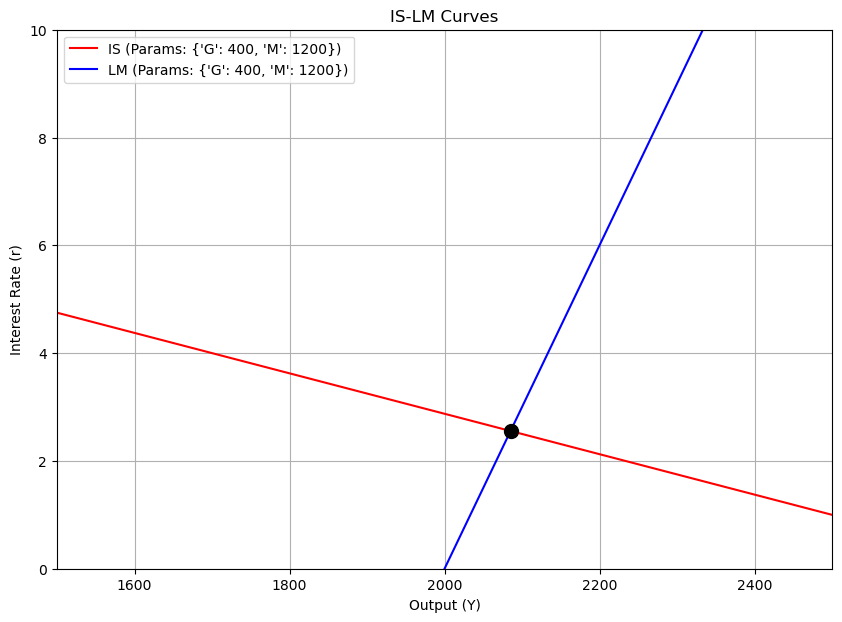

In [3]:
params1 = {'G': 400, 'M': 1200}
model_lump_sum.plot_curves((1500, 2500), (0, 10), params1)

# Policy scenarios

We now conduct some analyses of our model. Specifically, we show the effects of different policy scenarios i.e.:
- Increase in government spending (G) from *400 to 600*.  (fiscal policy)
- Decrease in money supply (M) from *1200 to 1000*. (monetary policy)

First, we increase the government spendings to *600*.

the equilibrium output and interest rate are (Y, r) = (2159.26, 4.78)


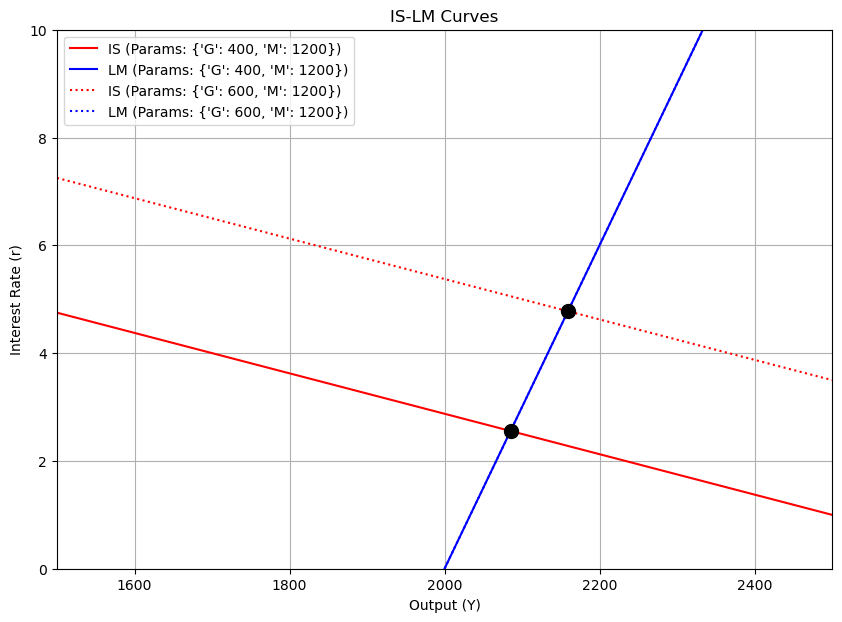

In [4]:
#Calculate the equilibrium for a different set of parameters
model_lump_sum.par.G = 600  # Set value for Government spending
model_lump_sum.par.M = 1200  # Set value for money supply
model_lump_sum.solve_IS_LM_numerically(initial_guess=[2000, 0.01])
model_lump_sum.print_solution_2()

#Plot the IS and LM curves for the new set of parameters
params1 = {'G': 400, 'M': 1200}
params2 = {'G': 600, 'M': 1200}  # Corrected to have unique G and M values

model_lump_sum.plot_curves((1500, 2500), (0, 10), params1, params2)

We note that an increase in government spendings, expansive fiscal policy, increases both the interest rate and income level of the economy.
We now analyze a decrease in the money supply from *1200 to 1000*:

the equilibrium output and interest rate are (Y, r) = (1788.89, 3.67)


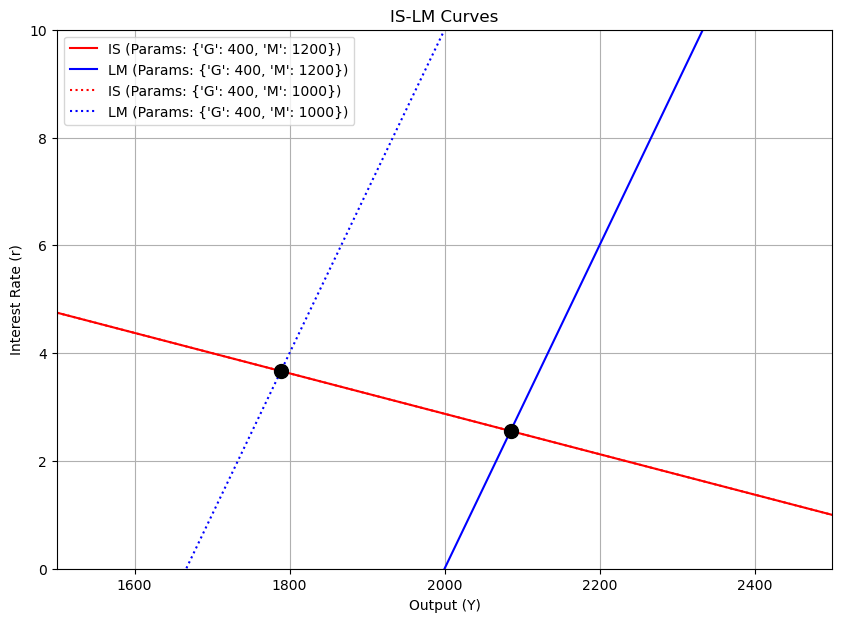

In [5]:
#Calculate the equilibrium for a different set of parameters
model_lump_sum.par.M = 1000     # Set value for Government spending
model_lump_sum.par.G = 400      # Set value for money supply
model_lump_sum.solve_IS_LM_numerically(initial_guess=[2000, 0.01])
model_lump_sum.print_solution_2()

#Plot the IS and LM curves for the new set of parameters
params1 = {'G': 400, 'M': 1200}
params2 = {'G': 400, 'M': 1000}  # Corrected to have unique G and M values

model_lump_sum.plot_curves((1500, 2500), (0, 10), params1, params2)

We observe a decreased money supply, contractionary monetary policy,the interest rate increases, while the income level decreases. The reason is that, an smaller money supply inbalances the equilibrium and increases the price of holding money in terms of the interest rate, which in turn decreases the output level through fewer investments.

We know analyze the effects of both governement spendings increasing and money supply decreasing.

the equilibrium output and interest rate are (Y, r) = (1862.96, 5.89)


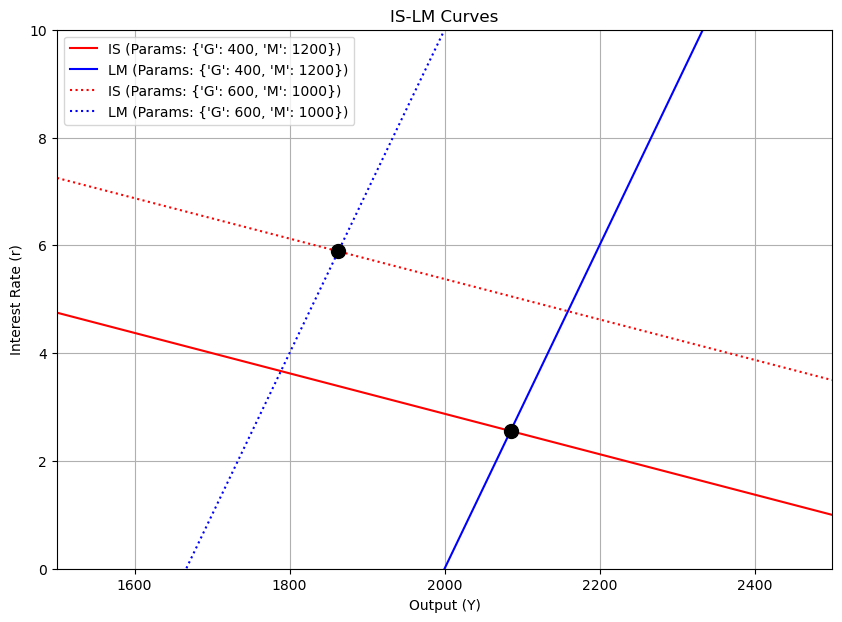

In [6]:
#Calculate the equilibrium for a different set of parameters
model_lump_sum.par.M = 1000  # Set new value for Government spending
model_lump_sum.par.G = 600  # Set new value for Government spending
model_lump_sum.solve_IS_LM_numerically(initial_guess=[2000, 0.01])
model_lump_sum.print_solution_2()

#Plot the IS and LM curves for the new set of parameters
params1 = {'G': 400, 'M': 1200}
params2 = {'G': 600, 'M': 1000}  # Corrected to have unique G and M values

model_lump_sum.plot_curves((1500, 2500), (0, 10), params1, params2)

We observe both the IS- and LM-curve shifting, increasing the interest rate and decreasing the output levels. It must imply the given decrease in money supply has a stronger effect on the income level than the expansive fiscal policy through increased government spendings. 
In this example we thus have the effect of this particular: monetary policy inititave > fiscal policy initiative

# Extension of model, proportional taxes

We now extend the model to include proportional taxes instead of lump-sum taxes. With proportional taxes the model is identical to before, but instead of $$T=\bar{T}$$ we define the IS function as:
$$
\begin{aligned}
Y &= C(Y - T) + I(r) + G \\
C &= a + b \cdot (Y - T) \\
I(r) &= c - d \cdot r \\
T &= t\cdot Y
\end{aligned}
$$
where *t* is the tax-rate.

We apply the same numerical method to solve for the same parameters as in the original model:
- t = 0.3   (tax rate)
- G = 400   (goverment spendings)
- M = 1200  (money supply)
- P = 1     (price level)
- a = 200   (autonomous consumption)
- b = 0.7   (marginal propensity to consume)
- c = 300   (autonomous investment)
- d = 80    (interest rate sensitivity of investment)
- e = 0.6   (sensitivity of money demand to changes in income)
- f = 20    (sensitivity of money demand to changes in interest rates)

For initial guesses: Y = 1000.0 and r = 5.0: the equilibrium output and interest rate are (Y, r) = (2084.10, 2.52)


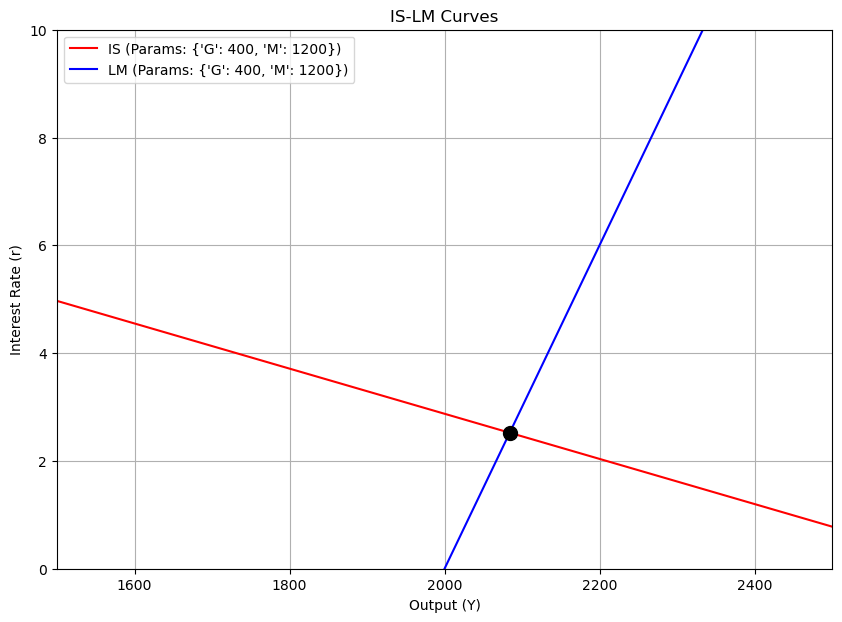

In [7]:
def proportional_tax(Y):
    t = 0.05  # Tax rate
    return t * Y

# Create an instance of the model with the new tax function
model_proportional_tax = IS_LM_numerical(tax_function=proportional_tax)

# Now use the model as before
model_proportional_tax.solve_IS_LM_numerically()
model_proportional_tax.print_solution()

#Plot the IS and LM curves for the new tax function
params1 = {'G': 400, 'M': 1200}
model_proportional_tax.plot_curves((1500, 2500), (0, 10), params1)

We see that it does not change the LM-curve, while the IS curve gets a little steeper. It implies for these specific parameter values, that both the income level and interest rate decreases. It indicates that the tax pressure under the proportional tax regime is stricter than the lump sum tax in this instance. But overall, we are very close to the same equilibrium.

We now also analyze the effect of government spendings and the money supply in the same way as before. The fact that the two initial eq. are very similiar, makes it easier to compare. First we increase government spendings.

the equilibrium output and interest rate are (Y, r) = (2157.22, 4.72)


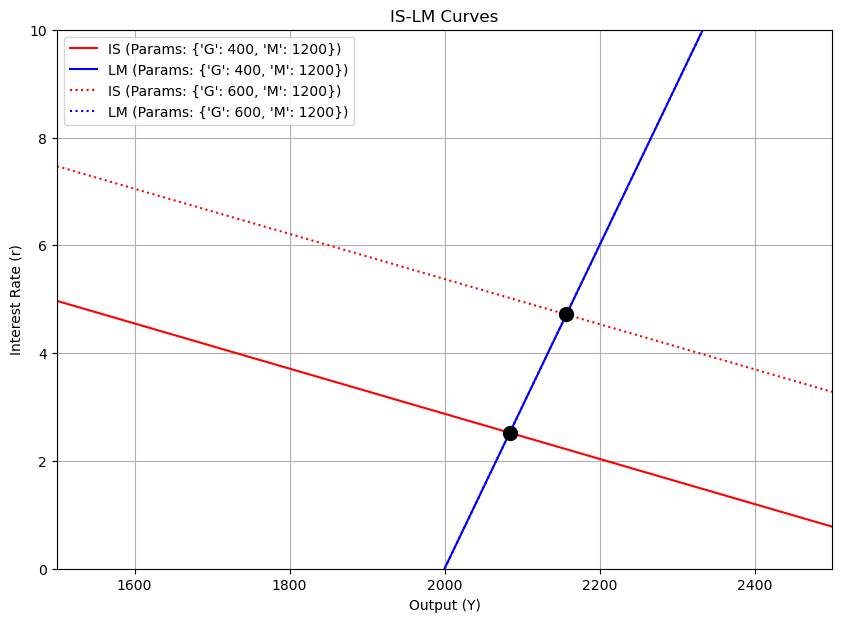

In [8]:
#Calculate the equilibrium for a different set of parameters
model_proportional_tax.par.G = 600  # Set value for Government spending
model_proportional_tax.par.M = 1200  # Set value for money supply
model_proportional_tax.solve_IS_LM_numerically(initial_guess=[2000, 0.01])
model_proportional_tax.print_solution_2()

#Plot the IS and LM curves for the new set of parameters
params1 = {'G': 400, 'M': 1200}
params2 = {'G': 600, 'M': 1200}  # Corrected to have unique G and M values

model_proportional_tax.plot_curves((1500, 2500), (0, 10), params1, params2)

It has the qualitative same effect as before, increases the interest rate and income level. The eq. is also very similar.

The effect from decreasing the money supply is as follows:

the equilibrium output and interest rate are (Y, r) = (1791.60, 3.75)


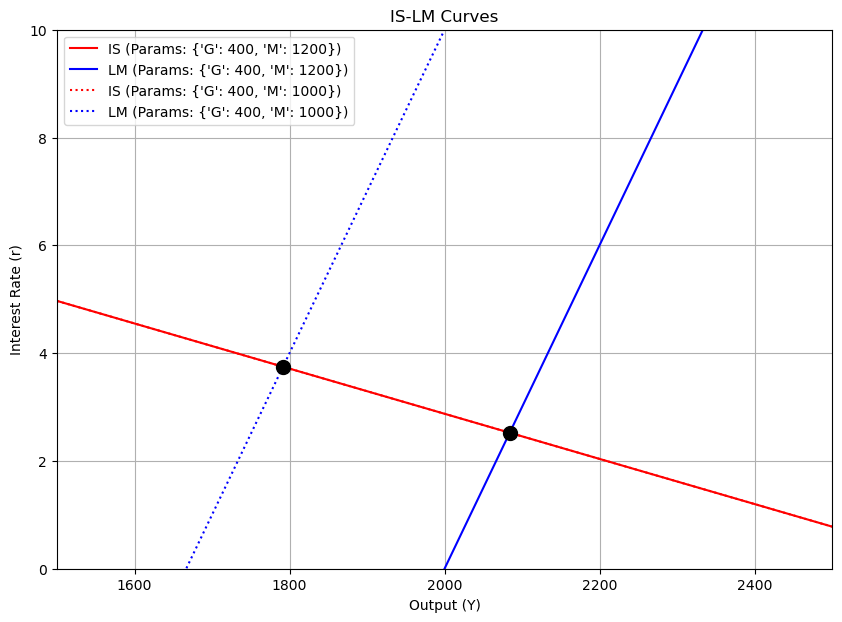

In [9]:
#Calculate the equilibrium for a different set of parameters
model_proportional_tax.par.G = 400  # Set value for Government spending
model_proportional_tax.par.M = 1000  # Set value for money supply
model_proportional_tax.solve_IS_LM_numerically(initial_guess=[2000, 0.01])
model_proportional_tax.print_solution_2()

#Plot the IS and LM curves for the new set of parameters
params1 = {'G': 400, 'M': 1200}
params2 = {'G': 400, 'M': 1000}  # Corrected to have unique G and M values

model_proportional_tax.plot_curves((1500, 2500), (0, 10), params1, params2)

We see the effects from a decrease in the money supply is qualatively the same as before, with the interest rate increasing and output decreasing. However, the effects seem a little bit stronger: output decreases more and the interest rate increases more.
The reason for this is the proportional tax and the slightly steeper IS-curve. This implies for a given shift in the LM-curve the changes will be more substantial.

the equilibrium output and interest rate are (Y, r) = (1864.72, 5.94)


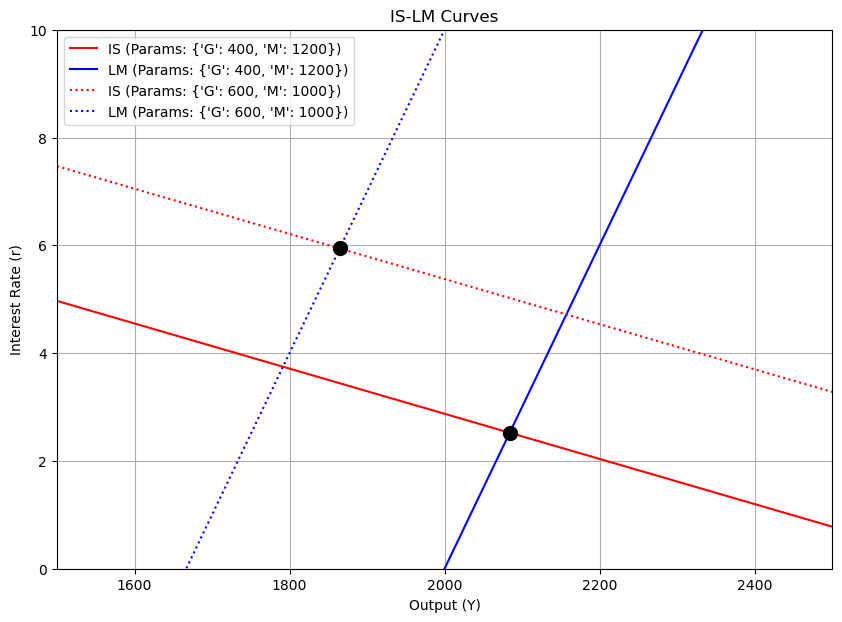

In [10]:
#Calculate the equilibrium for a different set of parameters
model_proportional_tax.par.G = 600  # Set value for Government spending
model_proportional_tax.par.M = 1000  # Set value for money supply
model_proportional_tax.solve_IS_LM_numerically(initial_guess=[2000, 0.01])
model_proportional_tax.print_solution_2()

#Plot the IS and LM curves for the new set of parameters
params1 = {'G': 400, 'M': 1200}
params2 = {'G': 600, 'M': 1000}  # Corrected to have unique G and M values

model_proportional_tax.plot_curves((1500, 2500), (0, 10), params1, params2)

We again observe the overall same effects. However, the effects again seem a little bit stronger: output decreases more and the interest rate increases more.
The reason is again the slightly steeper IS-curve due to the proportional tax rate.

# Conclusion

We have conducted an analysis of the IS-LM model, analytically and numerically. We have shown how expansionary fiscal policy, in the form of increased government spendings, increases the income level and interest rate. We also show how contractionary monetary policy, in the form of a smaller money supply, decreases income level, but increases the interest rate. Finally, we show how the model can be extendend to include proportional taxes instead of lump-sum taxes. A proportional tax rate implies a steeper IS-curve, which makes monetary policy initiatives have stronger effects.